In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model

2023-05-06 15:40:30.202070: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-06 15:40:30.287864: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-06 15:40:30.289964: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-06 15:40:32.385883: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
X_train = np.random.random_sample((700,9))*65.536-32.768
y_train = np.array([[0, 0, 0, 0, 0,0,0,0,0] for _ in range(700)])

In [3]:
model = Sequential()

model.add(Dense(input_dim=X_train.shape[1], units=9, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=9))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 90        
                                                                 
 dense_1 (Dense)             (None, 15)                150       
                                                                 
 dense_2 (Dense)             (None, 9)                 144       
                                                                 
Total params: 384
Trainable params: 384
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(optimizer='adam', loss='mse')

In [5]:
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
18/18 [==============================] - 2s 28ms/step - loss: 76.1555 - val_loss: 60.4793
Epoch 2/30
18/18 [==============================] - 0s 11ms/step - loss: 50.7723 - val_loss: 41.0054
Epoch 3/30
18/18 [==============================] - 0s 13ms/step - loss: 34.7576 - val_loss: 29.2263
Epoch 4/30
18/18 [==============================] - 0s 9ms/step - loss: 25.0427 - val_loss: 21.4246
Epoch 5/30
18/18 [==============================] - 0s 10ms/step - loss: 18.6347 - val_loss: 16.1406
Epoch 6/30
18/18 [==============================] - 0s 12ms/step - loss: 14.2623 - val_loss: 12.5092
Epoch 7/30
18/18 [==============================] - 0s 11ms/step - loss: 11.1375 - val_loss: 9.8576
Epoch 8/30
18/18 [==============================] - 0s 10ms/step - loss: 8.8343 - val_loss: 7.9389
Epoch 9/30
18/18 [==============================] - 0s 9ms/step - loss: 7.1198 - val_loss: 6.4898
Epoch 10/30
18/18 [==============================] - 0s 9ms/step - loss: 5.8108 - val_loss: 5.3772

Text(0, 0.5, 'loss')

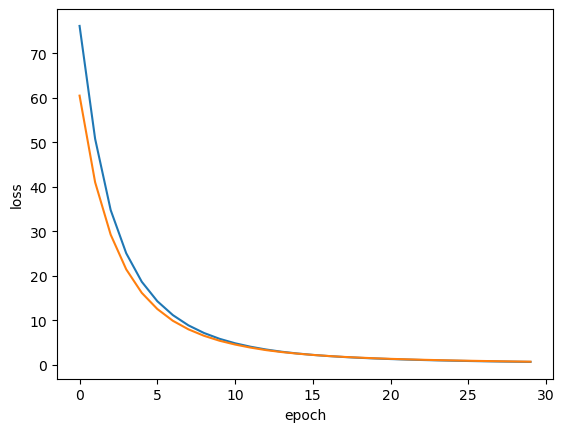

In [6]:
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

In [7]:
X_test = np.random.random_sample((200,9))*65.536-32.768
y_test = np.array([[0,0,0,0,0,0,0,0,0] for _ in range(200)])

In [8]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.7455


0.7454548478126526

In [10]:
model.save('../PROJ/models/ackley_model.hdf5')